  buying  maint door persons lug_boot safety  class
0  vhigh  vhigh    2       2    small    low  unacc
1  vhigh  vhigh    2       2    small    med  unacc
2  vhigh  vhigh    2       2    small   high  unacc
3  vhigh  vhigh    2       2      med    low  unacc
4  vhigh  vhigh    2       2      med    med  unacc
[3 3 3 ... 1 1 1]
acc =  0.7341040462427746
Predicted:  good Data:  (1, 2, 2, 0) Actual:  acc
Predicted:  unacc Data:  (0, 1, 2, 0) Actual:  unacc
Predicted:  good Data:  (1, 0, 1, 0) Actual:  vgood
Predicted:  good Data:  (0, 3, 0, 2) Actual:  good
Predicted:  good Data:  (0, 3, 2, 0) Actual:  good
Predicted:  good Data:  (1, 2, 1, 1) Actual:  good
Predicted:  good Data:  (1, 0, 1, 0) Actual:  unacc
Predicted:  good Data:  (0, 3, 2, 2) Actual:  good
Predicted:  good Data:  (2, 0, 1, 1) Actual:  good
Predicted:  unacc Data:  (1, 0, 0, 2) Actual:  unacc
Predicted:  good Data:  (1, 3, 0, 2) Actual:  unacc
Predicted:  unacc Data:  (2, 2, 2, 2) Actual:  unacc
Predicted:  unacc Data: 

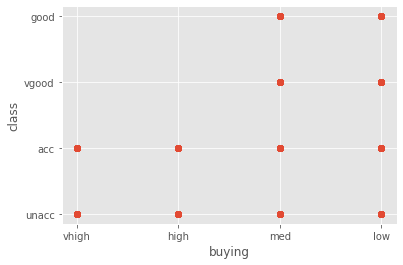

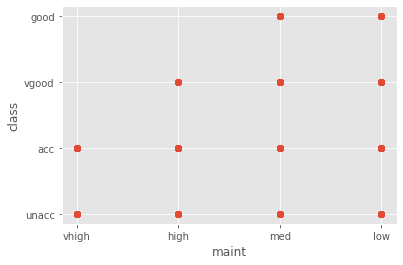

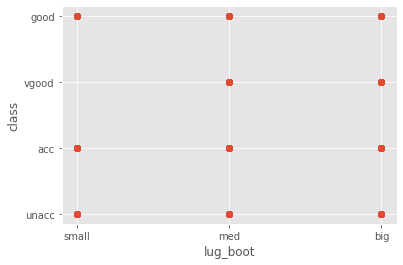

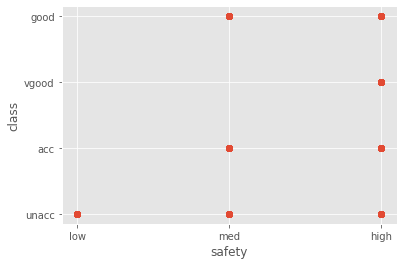

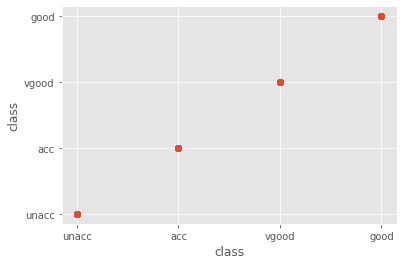

<Figure size 432x288 with 0 Axes>

In [43]:
# Import
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing
import matplotlib.pyplot as pyplot
from matplotlib import style

# Read data
data = pd.read_csv('car.data')
print(data.head())

for feature in features:  
    style.use("ggplot")
    pyplot.scatter(data[feature], data["class"])
    pyplot.xlabel(feature)
    pyplot.ylabel("class")    
    pyplot.figure()
    
pyplot.show

# Preprocess data
le = preprocessing.LabelEncoder()
buying = le.fit_transform(list(data["buying"]))
maint = le.fit_transform(list(data["maint"]))
lug_boot = le.fit_transform(list(data["lug_boot"]))
safety = le.fit_transform(list(data["safety"]))
cls = le.fit_transform(list(data["class"]))

print(buying)

features = ["buying", "maint", "lug_boot", "safety", "class"]
data = data[features]

predict = "class"

# Define features
X = list(zip(buying, maint, lug_boot, safety))
y = list(cls)

best = 0
for i in [1,2,3,4,5,6,7]:
    k = (2*i)+1
    for _ in range(30):
        # Train model
        x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)            


        model = KNeighborsClassifier(n_neighbors = k)

        model.fit(x_train, y_train)

        acc = model.score(x_test, y_test)
        if acc > best:
            best = acc
            
print("acc = ", acc)

predicted = model.predict(x_test)

names = ["unacc", "acc", "good", "vgood"]

for x in range(len(predicted)):
    print("Predicted: ", names[predicted[x]], "Data: ", x_test[x], "Actual: ", names[y_test[x]])